# Notebook Demo: Let's find a photo of a cat!

We'll be using the [CatAPI](https://thecatapi.com/) to find a photo of a cat!

You'll notice in this repository, there's a `scripts/` directory. Inside are the same code snippets that will allow you to:

- `basic_cat.py`: Find a cat photo
- `cat_by_breed.py`: Find a cat photo by breed

You can run these scripts from the commandline via `python basic_cat.py`.

##  Part 1: Let's get started to find a photo of the cat!

The below will "check out" the Python libraries we need to help us get started

```
import requests
from PIL import Image
from io import BytesIO
```

In [2]:
import requests
from PIL import Image
from pprint import pprint 

##  Part 1: Let's request an image!

We can `request` an image, much like when we use our browser to go to a website, with the `requests` Python library.

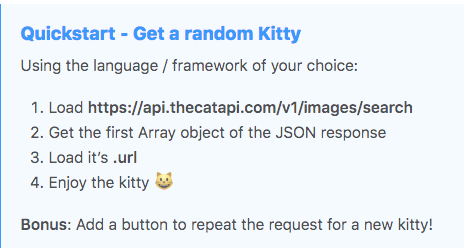

As the [CatAPI docs](https://docs.thecatapi.com/) show us above, to `get` the CatAPI we can `requests.get` to get the corresponding URL the CatAPI provides for us to get an image!

```
response = requests.get('https://api.thecatapi.com/v1/images/search')

if not response.ok:
    print("Error! Try again!")
```

Notice the docs also tell us, that the returned information from the `https://api.thecatapi.com/v1/images/search` includes a "url" attribute we can use to get a URL pointing to a cat image.

In [3]:
response = requests.get('https://api.thecatapi.com/v1/images/search')

if not response.ok:
    print("Error! Try again!")

images = response.json()

pprint(images)

[{'breeds': [],
  'height': 3104,
  'id': 'au2',
  'url': 'https://cdn2.thecatapi.com/images/au2.jpg',
  'width': 4428}]


##  Part 2: Great! Let's open the Image with Python!

Awesome! We can see the `url` with the cat image exists. Time to open that image with Python!

Python has another library, the [`PIL` library](https://pillow.readthedocs.io/en/stable/) -- standing for `Python Image Library`.

With all of our Python libraries, like the CatAPI, we have documentation to tell us *how* to use the tool.

Per the PIL docs we see that we can use `Image.open` and provide a name of an image we wish to open:

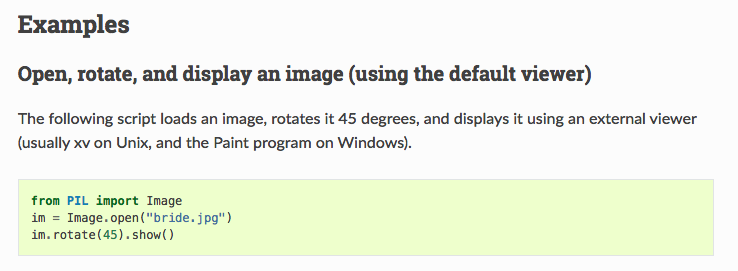

In [4]:
for image in images:
    image_url = image.get('url')
    Image.open(image_url)

FileNotFoundError: [Errno 2] No such file or directory: 'https://cdn2.thecatapi.com/images/au2.jpg'

## Error!

Uh oh! The URL we get from the CatAPI doesn't provide an image that exists on our computer, but points to one on the internet. 

How can we `Image.open` an image from the internet using `PIL`?

## Part 3: Opening an Image with Python from the internet!

Luckily, the [PIL docs can help us figure this out](https://pillow.readthedocs.io/en/stable/releasenotes/2.8.0.html?#open-http-response-objects-with-image-open)! Using the `search` functionality in the PIL docs we come across the following:

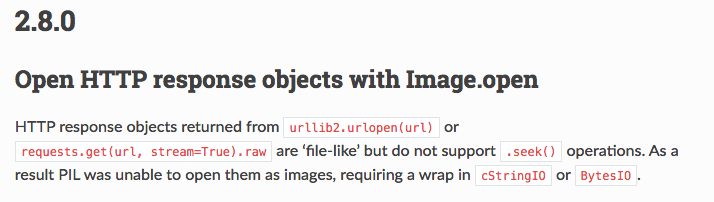

Therefore, we will want to use `requests` to get the `Image`: `Image.open(requests.get(url, stream=True).raw)`.

In [7]:
for image in images:
    image_url = image.get('url')
    image_response = requests.get(image_url, stream=True)
    if image_response.ok:
        image = Image.open(image_response.raw)
        image.show()
    else:
        print("Unable to get cat image! Try again!")

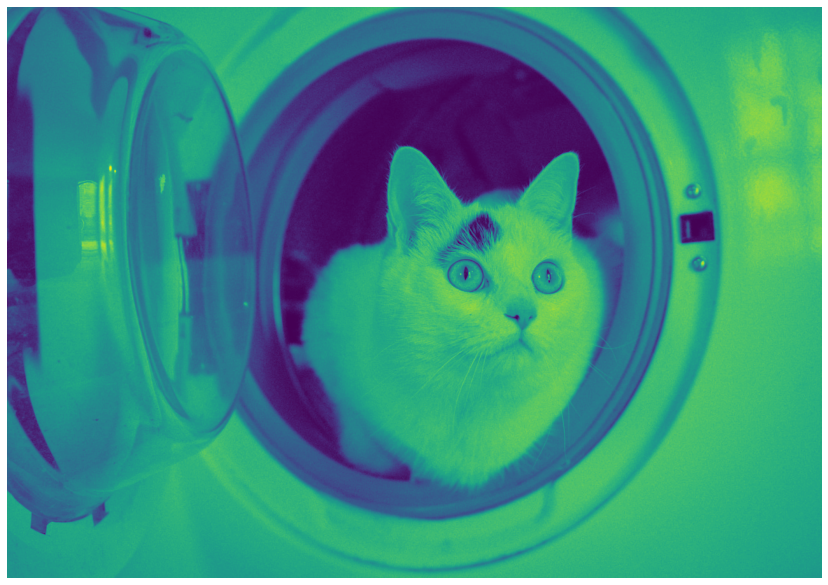

In [11]:
# Render here in the notebook

import matplotlib.pyplot as plt
import numpy as np

for image in images:
    image_url = image.get('url')
    image_response = requests.get(image_url, stream=True)
    if image_response.ok:
        image = Image.open(image_response.raw)
        im_array = np.asarray(image)
        plt.imshow(im_array)
        plt.axis('off')
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.show()
    else:
        print("Unable to get cat image! Try again!")

## What about if we want to find a cat by a category?

We should always look at the CatAPI docs to see what we can do! And we are in lucky, categories are supported!

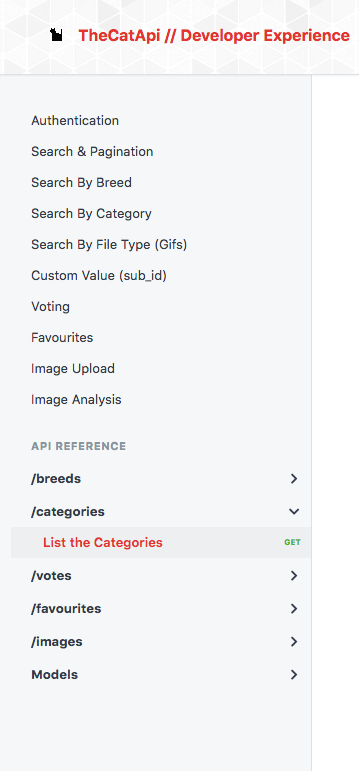

To find a cat by a category, we can use the `https://api.thecatapi.com/v1/categories` URL!

Using `categories` requires us to have to get an `API_KEY`, or in this case a password. Luckily we have that setup already! Which is what our next code snippet does!

In [22]:
%load_ext dotenv
%dotenv

import os

CAT_API_KEY = os.environ.get("CAT_API_KEY")

CAT_API = 'https://api.thecatapi.com/v1'

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [23]:
categories = requests.get(f"{CAT_API}/categories", headers={"x-api-key": CAT_API_KEY})

if categories.ok:
    print(f"Here are categories:\n")
    for category in categories.json():
        print(f"ID: {category.get('id')} - {category.get('name')}")

Here are categories:

ID: 5 - boxes
ID: 15 - clothes
ID: 1 - hats
ID: 14 - sinks
ID: 2 - space
ID: 4 - sunglasses
ID: 7 - ties


## Which category do we want to show? 

Our options again are:

| ID | Category |
| -- | -- |
| 5 | Boxes |
| 15 | Clothes |
| 1 | Hats |
| 14 | Sinks |
| 2 | Space |
| 4 | Sunglasses |
| 7 | Ties |

In [47]:
category_id = 5 # 'FILL ME IN'

In [50]:
response = requests.get(f"{CAT_API}/images/search?category_ids={category_id}", headers={"x-api-key": CAT_API_KEY})

if not response.ok:
    print("Error! Try again!")

images = response.json()

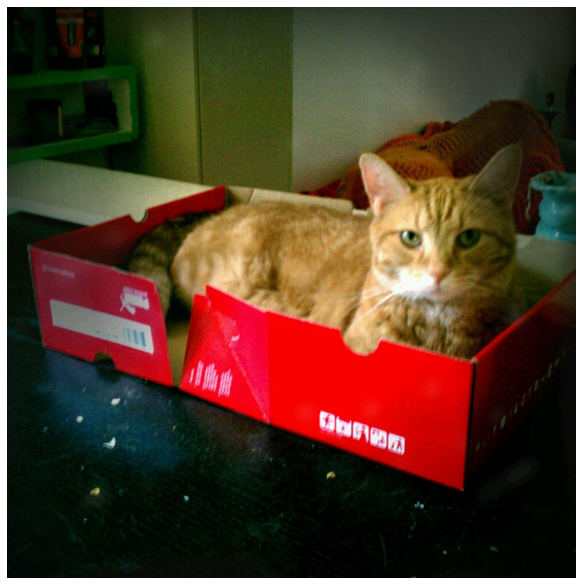

In [51]:
for image in images:
    image_url = image.get('url')
    image_response = requests.get(image_url, stream=True)
    if image_response.ok:
        image = Image.open(image_response.raw)
        im_array = np.asarray(image)
        plt.imshow(im_array)
        plt.axis('off')
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.show()
    else:
        print("Unable to get cat image! Try again!")

## For more learning

Checkout the code in the GitHub repository at: https://github.com/lorenanicole/parents-open-school-python-101! 